# Régression multiple en Python : Exemple du jeu de données ozone


La pollution de l’air constitue actuellement une des préoccupations majeures de santé publique. De nombreuses études épidémiologiques ont permis de mettre en évidence l’influence sur la santé de certains composés chimiques comme le dioxyde de souffre (SO2), le dioxyde d’azote (NO2), l’ozone (O3) ou des particules sous forme de poussières contenues dans l’air.

Des associations de surveillance de la qualité de l’air existent sur tout le territoire français et mesurent la concentration des polluants. Elles enregistrent également les conditions météorologiques comme la température, la nébulosité, le vent, etc.

Nous souhaitons analyser ici la relation entre le maximum journalier de la concentration en ozone (en μg/m3) et la température. Nous disposons de 112 données relevées durant l’été 2001 à Rennes. Nous souhaitons analyser ici la relation entre le maximum journalier de la concen- tration en ozone (en μg/m3) et la température à différentes heures de la journée, la nébulosité à différentes heures de la journée, la projection du vent sur l’axe Est-Ouest à différentes heures de la journée et la concentration maximale de la veille du jour considéré. Nous disposons de 112 données relevées durant l’été 2001.

Nous supposons donc que les n données collectées suivent le modèle suivant :

$$y_i = \beta_0 +\beta_1x_{i1} + ... + \beta_px_{ip} + \epsilon_i,\; i=1,\ldots,n, $$
où $x_{ij}$ est la valeur prise par l’individu $i$ pour la variable $j$, les valeurs $x_{ij}$ étant rangées dans la matrice du plan d’expérience notée $X$. Les paramètres $\beta_j$ du modèle sont inconnus et à estimer. Le paramètre $\beta_0$ (intercept dans les logiciels anglo-saxons) correspond à la constante du modèle. Les $\epsilon_i$ sont des variables aléatoires inconnues et représentent les erreurs de mesure.


1. Chargement des librairies et des données

In [1]:
import statsmodels.api as sm
import pandas as pd

Pour accéder aux données enregistrées sur votre *drive*, il faut exécuter :

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df = pd.read_csv("ozone.csv", header = 0, index_col = 0)

Pour accéder aux données enregistrées *localement sur votre ordinateur*, exéctuer la commande ci-dessous et choisissez le fichier ozone.csv :

In [54]:
from google.colab import files
uploaded = files.upload()

Saving ozone.csv to ozone.csv


In [69]:
df = pd.read_csv("ozone.csv", header = 0, index_col = 0)

On peut maintenant inspecter le tableau de données avec info()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 20010601 to 20010930
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   maxO3   112 non-null    int64  
 1   T9      112 non-null    float64
 2   T12     112 non-null    float64
 3   T15     112 non-null    float64
 4   Ne9     112 non-null    int64  
 5   Ne12    112 non-null    int64  
 6   Ne15    112 non-null    int64  
 7   Vx9     112 non-null    float64
 8   Vx12    112 non-null    float64
 9   Vx15    112 non-null    float64
 10  maxO3v  112 non-null    int64  
 11  vent    112 non-null    object 
 12  pluie   112 non-null    object 
dtypes: float64(6), int64(5), object(2)
memory usage: 12.2+ KB


Description des variables :
MaxO3 : Maximum de concentration d’ozone observé sur la journée en
µgr/m3

• T9, T12, T15 : Température observée à 9, 12 et 15h

• Ne9, Ne12, Ne15 : Nébulosité observée à 9, 12 et 15h

• Vx9, Vx12, Vx15 : Composante E-O du vent à 9, 12 et 15h

• MaxO3v : Teneur maximum en ozone observée la veille

• vent : orientation du vent à 12h

• pluie : occurrence ou non de précipitations

In [4]:
df.shape

(112, 13)

In [5]:
#to see the last 5 rows 
df.tail() 

#to see the first 5 rows
#df.head()

,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,vent,pluie
20010925,84,13.3,17.7,17.8,3,5,6,0.0000,-1.0000,-1.2856,76,Sud,Sec
20010927,77,16.2,20.8,22.1,6,5,5,-0.6946,-2.0000,-1.3681,71,Sud,Pluie
20010928,99,16.9,23.0,22.6,6,4,7,1.5000,0.8682,0.8682,77,Sud,Sec
20010929,83,16.9,19.8,22.1,6,5,3,-4.0000,-3.7588,-4.0000,99,Ouest,Pluie
20010930,70,15.7,18.6,20.7,7,7,7,0.0000,-1.0419,-4.0000,83,Sud,Sec


In [6]:
#Statistical description :

df.describe()

,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,90.303571,18.360714,21.526786,22.627679,4.928571,5.017857,4.830357,-1.214346,-1.611004,-1.690683,90.571429
std,28.187225,3.122726,4.042321,4.530859,2.594916,2.281860,2.332259,2.632742,2.795673,2.810198,28.276853
min,42.000000,11.300000,14.000000,14.900000,0.000000,0.000000,0.000000,-7.878500,-7.878500,-9.000000,42.000000
25%,70.750000,16.200000,18.600000,19.275000,3.000000,4.000000,3.000000,-3.276450,-3.564700,-3.939200,71.000000
50%,81.500000,17.800000,20.550000,22.050000,6.000000,5.000000,5.000000,-0.866000,-1.879400,-1.549650,82.500000
75%,106.000000,19.925000,23.550000,25.400000,7.000000,7.000000,7.000000,0.694600,0.000000,0.000000,106.000000
max,166.000000,27.000000,33.500000,35.500000,8.000000,8.000000,8.000000,5.196200,6.577800,5.000000,166.000000


2. On peut à présent représenter les données graphiquement avec des histogrammes et des ptairs plotsa

In [7]:
import seaborn as sns

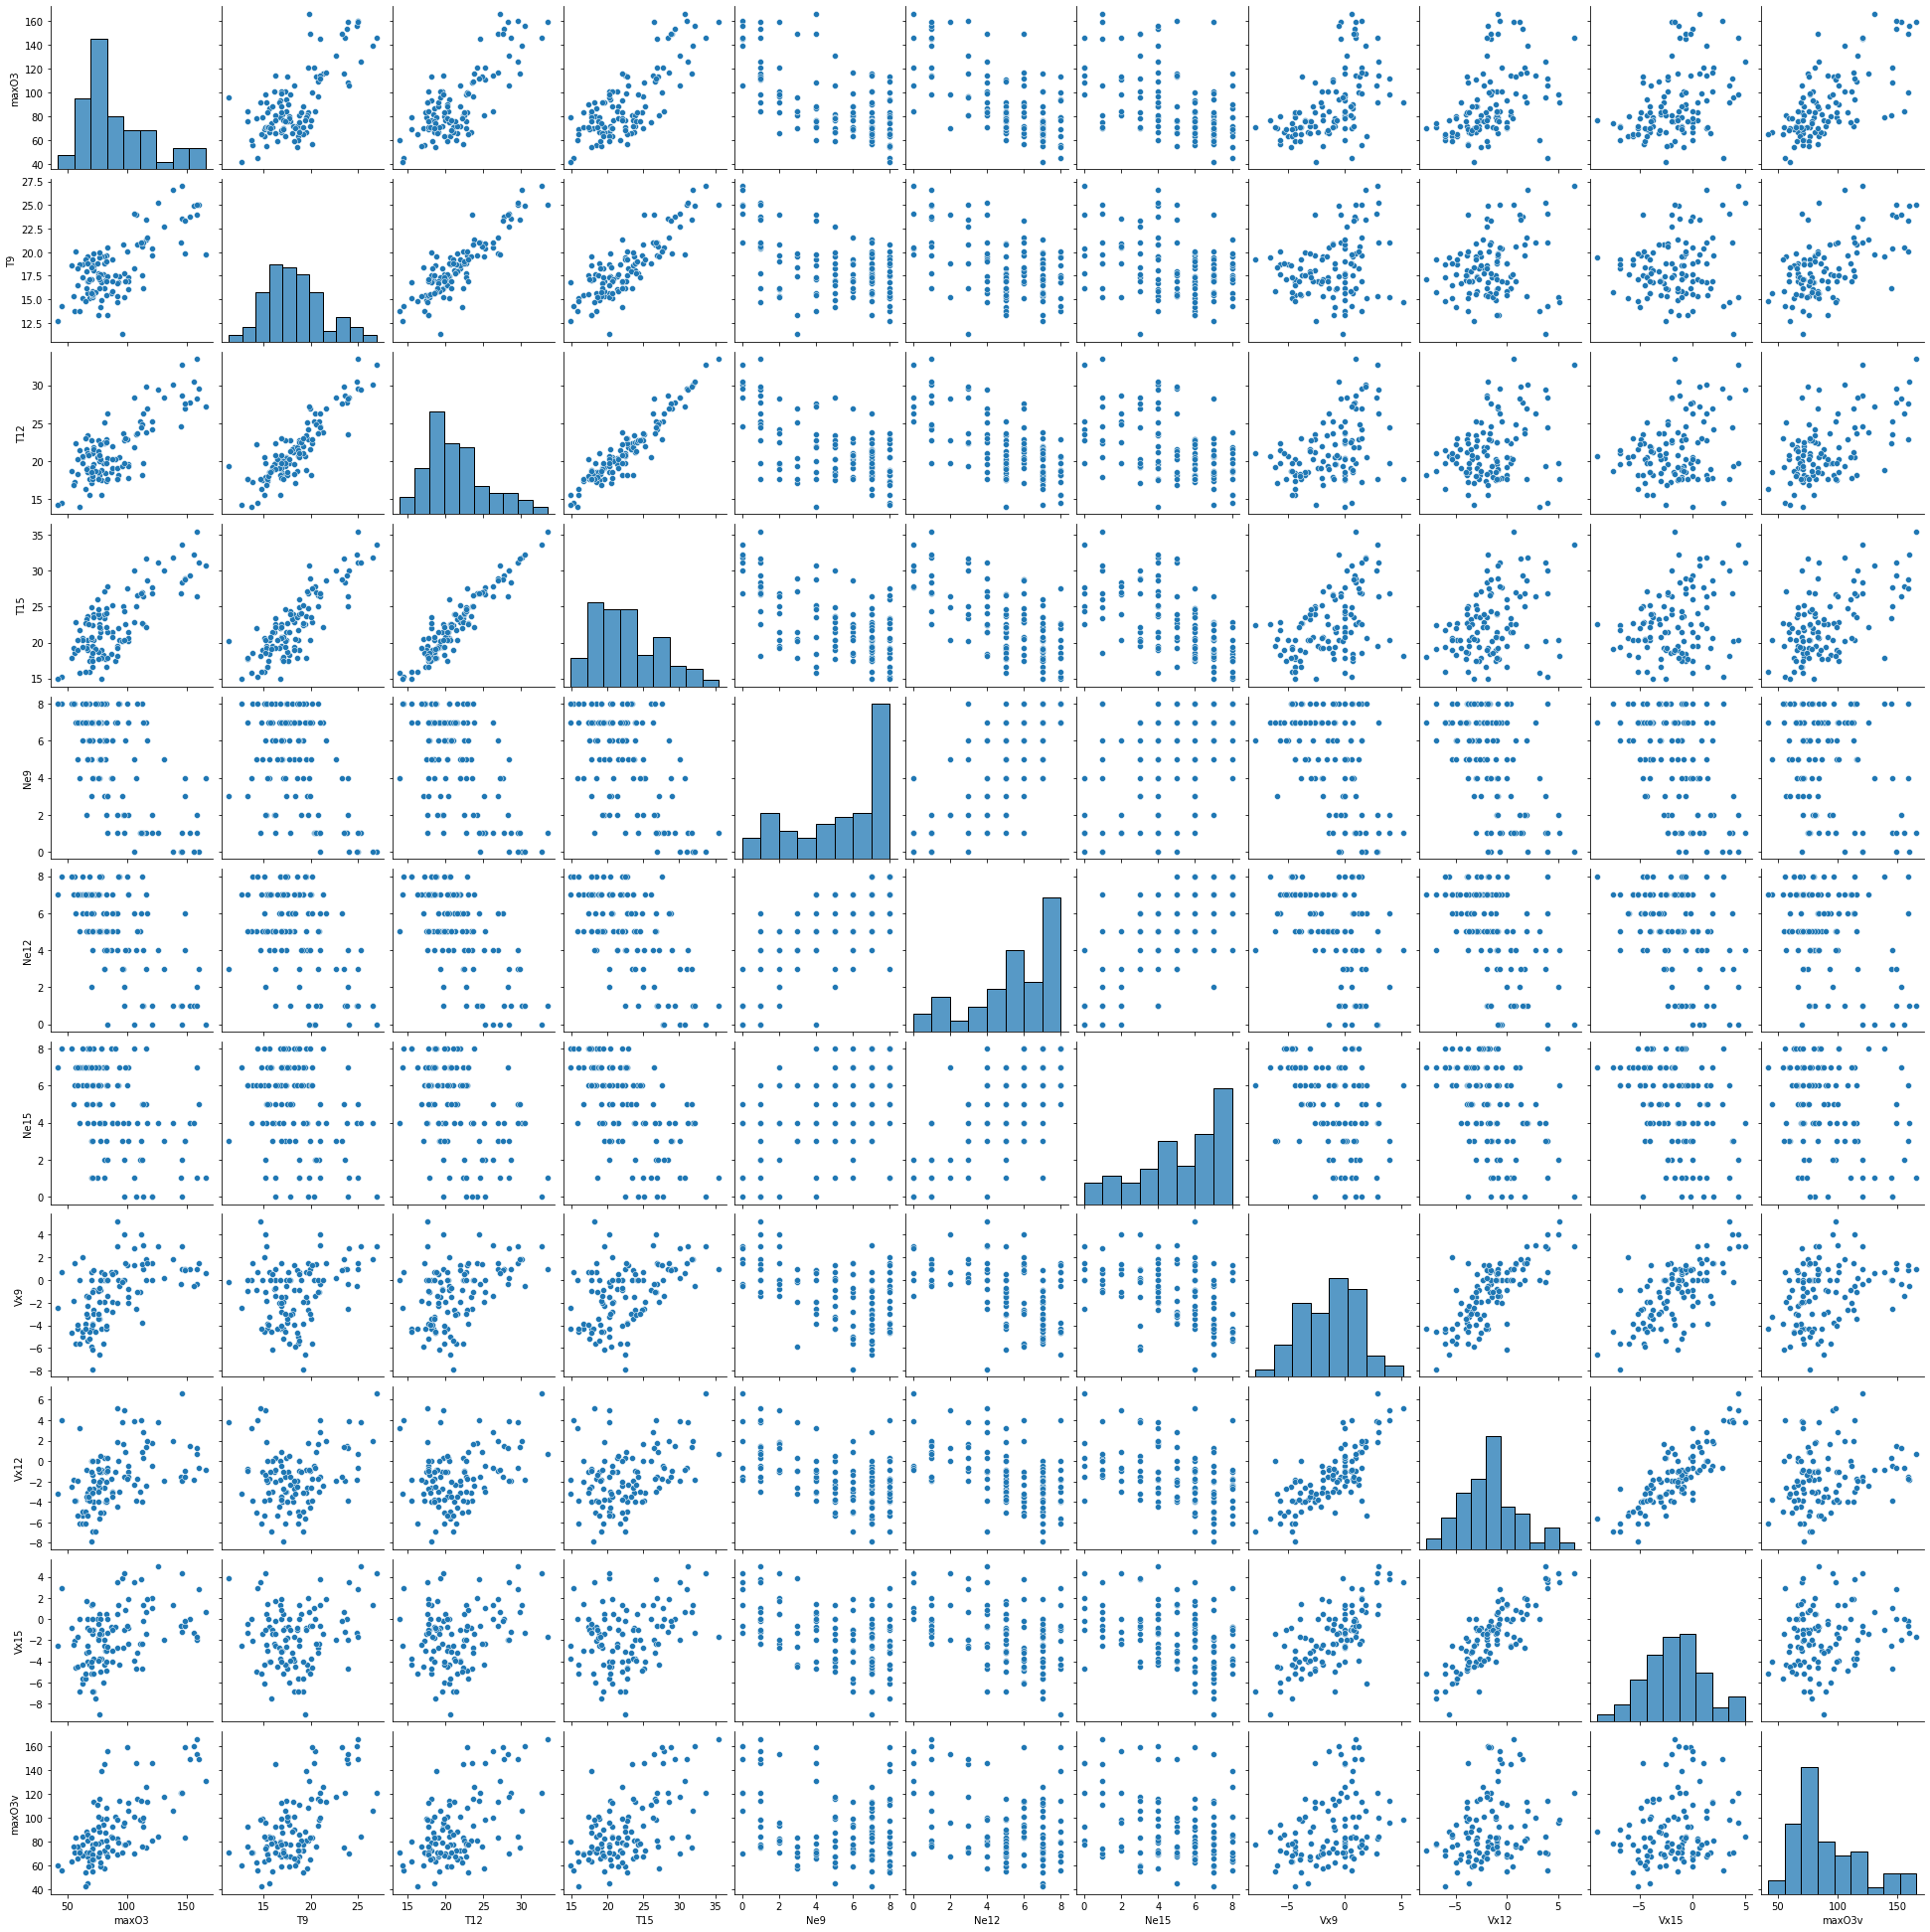

In [8]:
sns.pairplot(df)

3. On passe maintenant à l'estimation des paramètres du modèles de régression multiple. Il faut d'abord créer les matrices de design avec patsy (cf TP précédent)

In [9]:
from patsy import dmatrices

In [10]:
y, X = dmatrices('maxO3 ~ T9 + T12 + T15 + Ne9 + Ne12 + Ne15 + Vx9 + Vx12 + Vx15 +maxO3v', data=df, return_type='dataframe')
y.info()
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 20010601 to 20010930
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   maxO3   112 non-null    float64
dtypes: float64(1)
memory usage: 1.8 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 20010601 to 20010930
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Intercept  112 non-null    float64
 1   T9         112 non-null    float64
 2   T12        112 non-null    float64
 3   T15        112 non-null    float64
 4   Ne9        112 non-null    float64
 5   Ne12       112 non-null    float64
 6   Ne15       112 non-null    float64
 7   Vx9        112 non-null    float64
 8   Vx12       112 non-null    float64
 9   Vx15       112 non-null    float64
 10  maxO3v     112 non-null    float64
dtypes: float64(11)
memory usage: 10.5 KB


Ensuite, l'estimation des paramètres par les moindres carrés se fait comme pour la régression simple avec OLS :

In [11]:
mod = sm.OLS(y,X)
res = mod.fit()

In [12]:
res.params

Intercept    12.244420
T9           -0.019014
T12           2.221152
T15           0.558531
Ne9          -2.189092
Ne12         -0.421015
Ne15          0.183731
Vx9           0.947909
Vx12          0.031198
Vx15          0.418593
maxO3v        0.351976
dtype: float64

La fonction OLS renvoie aussi de nombreuses informations utiles pour l'inférence, comme les valeurs-P et les intervalles de confiance.

In [13]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  maxO3   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     32.67
Date:                Sun, 24 Oct 2021   Prob (F-statistic):           2.55e-27
Time:                        14:45:33   Log-Likelihood:                -451.55
No. Observations:                 112   AIC:                             925.1
Df Residuals:                     101   BIC:                             955.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.2444     13.472      0.909      0.366     -14.480      38.969
T9            -0.0190      1.125     -0.017      0.987      -2.251       2.213
T12            2.2212      1.433      1.550      0.124      -0.621       5.064
T15            0.5585      1.145      0.488      0.627      -1.712       2.829
Ne9           -2.1891      0.938     -2.333      0.022      -4.050      -0.328
Ne12          -0.4210      1.368     -0.308      0.759      -3.134       2.292
Ne15           0.1837      1.003      0.183      0.855      -1.806       2.173
Vx9            0.9479      0.912      1.039      0.301      -0.862       2.758
Vx12           0.0312      1.055      0.030      0.976      -2.062       2.124
Vx15           0.4186      0.916      0.457      0.649      -1.398       2.235
maxO3v         0.3520      0.063      5.597      0.000       0.227       0.477
==============================================================================
Omnibus:                        8.335   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.015   Jarque-Bera (JB):               17.369
Skew:                           0.045   Prob(JB):                     0.000169
Kurtosis:                       4.927   Cond. No.                     1.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

4. Commentez les résultats de la régression multiple sur les données ozone : La température a-t-elle un effet sur la concentration en ozone ? Quelles semblent être les variables les plus importantes ? Proposez des représentations graphiques.

On peut voir d'après les P-valeurs des variables que la correlation est assez faible; 
Or la variable "T12" a un effet assez considèrable vis-à-vis le reste des variables.


In [19]:
import plotly.express as px 

fig = px.scatter(df, x="T12", y="maxO3v", trendline="ols")

fig.show()

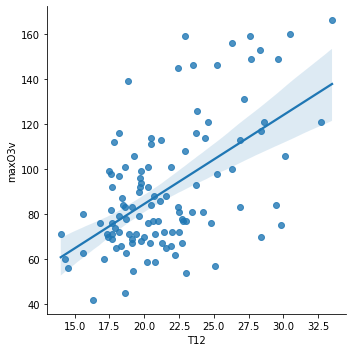

In [17]:
sns.lmplot(x="T12", y="maxO3v", data=df)